In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import function as func
import csv
import matplotlib.patches as patches

In [4]:
import matplotlib.ticker
class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=False):
        self.oom= order
        self.fformat= fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude= self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format= self.fformat
        if self._useMathText:
            self.format= r'$\mathdefault{%s}$' % self.format

In [5]:
check_freq = np.array([18190, 18336, 19120, 19186, 19440, 19478, 19766, 19794, 19818, 20006, 20296, 20302, 20490, 20540, 20892, 21442, 21808, 22522, 22672, 23306, 23808, 23934, 25328, 25352, 25860, 26274, 26346])
check_freq = check_freq*1000 - 250

A_geom = np.pi * (59.3/2*1e-3)**2
eta = 0.63
c = 299792458. # [m/sec] speed of light from wikipedia
v_c = 220.e+3 # [m/sec] speed of solar system
h_plunk = 6.62607004e-34
ev = 1.602176634e-19
const = ev/h_plunk/1e9 # 2.4e5
const_zoom = ev/h_plunk/1e9/1e6 # 2.4e5

def eta_win(freq):
    return 0.23 + 0.017 * (freq - 22)

# Old limit plot

In [4]:
def plot_zoom(axes):
    path = ["HPDM_by_shugo"]
    color = ["blue"]
    legend = ["CMB"]
    hatch = ["\\"]
    for i in range(len(path)):
        data = np.loadtxt("plot/constraints_copy/{}.txt".format(path[i]), delimiter = ",", unpack = True)
        mass = 10 ** data[0]
        chi = 10 ** data[1]
        upper = [10**-4*1e10] * len(mass)
        # color
        # axes.fill_between(mass*1e6, chi*1e10, upper, label=legend[i], color=color[i], alpha=0.2)
        # gray
        axes.fill_between(mass*1e6, chi*1e10, upper, label=legend[i], fc="w", hatch=hatch[i])
        axes.plot(mass*1e6, chi*1e10, color="black")
    
    """
    data = np.loadtxt("plot/constraints_copy/result_raw.txt", unpack = True)
    mass = data[0] * 1e-6
    chi = data[1]
    upper = [10**-4] * len(mass)
    axes.fill_between(mass*1e6, chi, upper, label="Pilot Experiment", color="black")
    print(mass[0]*const_zoom)
    print(mass[-1]*const_zoom)
    """
    
    data = func.csv_to_array("/data/ms2840a/result_data/chi_limit_final.csv")
    """
    # color
    axes.fill_between(data["freq"]/const_zoom, data["chi"]*1e10, np.ones(len(data["chi"]))*1e10, color="red", label="This Result", alpha=0.3)
    axes.plot(data["freq"]/const_zoom, data["chi"]*1e10, color="red")
    axes.axvline(x=data["freq"][0]/const_zoom, ymin=data["chi"][0]/1e-9*1e10, ymax=1, color="red")
    axes.axvline(x=data["freq"][-1]/const_zoom, ymin=data["chi"][-1]/1e-9*1e10, ymax=1, color="red")
    """
    # gray 
    axes.fill_between(data["freq"]/const_zoom, data["chi"]*1e10, np.ones(len(data["chi"]))*1e10, fc="w", hatch="///", label="This Result")
    axes.plot(data["freq"]/const_zoom, data["chi"]*1e10, color="black")
    axes.axvline(x=data["freq"][0]/const_zoom, ymin=(data["chi"][0]*1e10)/10, ymax=1, color="black")
    axes.axvline(x=data["freq"][-1]/const_zoom, ymin=(data["chi"][-1]*1e10)/10, ymax=1, color="black")
    
    axes.set_xlabel(r"Dark Photon Mass $m_{\rm DP} ~\rm [\mu eV/c^2]$")
    axes.set_ylabel(r"Coupling Constant $\chi ~[\times 10^{-10}]$")
    axes.set_xlim(70, 115)
    axes.set_ylim(0, 10)
    #axes.yaxis.set_major_formatter(OOMFormatter(-10, "%1.1f"))
    axes.tick_params(axis='x')
    axes.tick_params(axis='y')
    axes.grid()

    x1, x2 = axes.get_xlim() 
    twin_axes=axes.twiny() 
    twin_axes.set_xlim(const_zoom*x1,const_zoom*x2)
    twin_axes.set_xlabel("Frequency [GHz]")
    twin_axes.tick_params(axis='x')

In [5]:
def plot_this(axes):
    path = ["HPDM_by_shugo", "Redo_rev", "Haloscope_blue_0", "Haloscope_blue_1", "Haloscope_blue_2"]
    color = ["blue", "magenta", "green", "green", "green"]
    legend = ["CMB", "Solar Lifetime", "Haloscope", "", ""]
    hatch = ["\\", "..", "--", "--", "--"]
    for i in range(len(path)):
        data = np.loadtxt("plot/constraints_copy/{}.txt".format(path[i]), delimiter = ",", unpack = True)
        mass = 10 ** data[0]
        chi = 10 ** data[1]
        upper = [10**-4] * len(mass)
        # color
        # axes.fill_between(mass, chi, upper, label=legend[i], color=color[i], alpha=0.2)
        # gray
        axes.fill_between(mass, chi, upper, label=legend[i], fc="w", hatch=hatch[i])
        axes.plot(mass, chi, color="black")
        axes.plot([mass[0], mass[0]], [chi[0], upper[0]], color="black")
        axes.plot([mass[-1], mass[-1]], [chi[-1], upper[-1]], color="black")

    data = np.loadtxt("plot/constraints_copy/result_raw.txt", unpack = True)
    mass = data[0] * 1e-6
    chi = data[1]
    upper = [10**-4] * len(mass)
    axes.fill_between(mass, chi, upper, label="Tomita et al.", color="black")
    
    data = func.csv_to_array("/data/ms2840a/result_data/chi_limit_final.csv")
    """
    # color
    axes.fill_between(data["freq"]/const, data["chi"], np.ones(len(data["chi"])), color="red", label="This Result", alpha=0.3)
    axes.plot(data["freq"]/const, data["chi"], color="red")
    axes.axvline(x=data["freq"][0]/const, ymin=(11+np.log10(data["chi"][0]))/3, ymax=1, color="red")
    axes.axvline(x=data["freq"][-1]/const, ymin=(11+np.log10(data["chi"][-1]))/3, ymax=1, color="red")
    """
    # gray
    axes.fill_between(data["freq"]/const, data["chi"], np.ones(len(data["chi"])), fc="w", hatch="///", label="This Result")
    axes.plot(data["freq"]/const, data["chi"], color="black")
    axes.axvline(x=data["freq"][0]/const, ymin=(11+np.log10(data["chi"][0]))/3, ymax=1, color="black")
    axes.axvline(x=data["freq"][-1]/const, ymin=(11+np.log10(data["chi"][-1]))/3, ymax=1, color="black")
    
    axes.set_xlabel(r"Dark Photon Mass $m_{\rm DP} ~\rm [eV/c^2]$")
    axes.set_ylabel(r"Coupling Constant $\chi$")
    axes.set_xlim(1e-6, 1e-2)
    axes.set_ylim([1e-11, 1e-8])
    axes.set_xscale('log')
    axes.set_yscale('log')
    axes.tick_params(axis='x')
    axes.tick_params(axis='y')
    axes.legend(loc="upper left", fontsize=18).get_frame().set_alpha(1)
    axes.grid()
    
    x1, x2 = axes.get_xlim() 
    twin_axes=axes.twiny() 
    twin_axes.set_xscale("log")
    twin_axes.set_xlim(const*x1,const*x2)
    twin_axes.set_xlabel("Frequency [GHz]")
    twin_axes.tick_params(axis='x')

OSError: plot/constraints_copy/HPDM_by_shugo.txt not found.

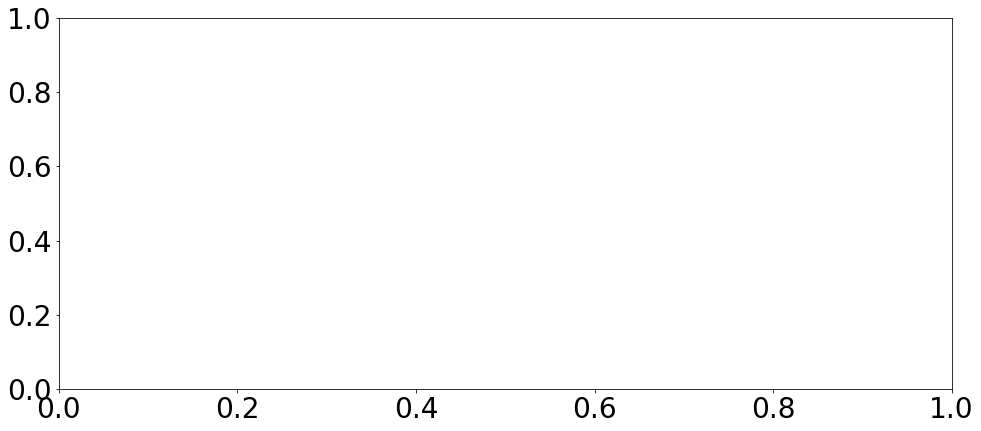

In [6]:
fig = plt.figure(figsize=(16, 15))
plt.rcParams["font.size"] = 28
#plt.suptitle("Constraints for Dark Photon Search")
plt.subplots_adjust()


# Create first axes, the top-left plot with green plot
sub1 = fig.add_subplot(2,1,1) # two rows, two columns, fist cell
plot_this(sub1)


# Create second axes, the top-left plot with orange plot
sub2 = fig.add_subplot(2,1,2) # two rows, two columns, second cell
plot_zoom(sub2)

#sub1.fill_between((70e-6,115e-6), 1e-9, 1, facecolor='orange', alpha=0.2)
con1 = patches.ConnectionPatch(xyA=(70, 1e-9*1e10), coordsA=sub2.transData, 
                       xyB=(70e-6, 1e-9), coordsB=sub1.transData, color='black', linestyle = "--", linewidth=2)
fig.add_artist(con1)
con2 = patches.ConnectionPatch(xyA=(115, 1e-9*1e10), coordsA=sub2.transData, 
                       xyB=(115e-6, 1e-9), coordsB=sub1.transData, color='black', linestyle = "--", linewidth=2)
fig.add_artist(con2)

fig.tight_layout()

plt.savefig("../result_figure/limit_zoom_gray.png")

In [ ]:
fig, axes = plt.subplots(figsize=(15, 9))
plt.rcParams["font.size"] = 40
#plt.suptitle("Constraints for Dark Photon Search")
plt.subplots_adjust()

path = ["HPDM_by_shugo", "Redo_rev", "Haloscope_blue_0", "Haloscope_blue_1", "Haloscope_blue_2"]
#path = ["HPDM_by_shugo"]
color = ["blue", "magenta", "green", "green", "green"]
#color = ["blue"]
legend = ["CMB", "Solar Lifetime", "Haloscope", "", ""]
#legend = ["CMB"]
for i in range(len(path)):
    data = np.loadtxt("plot/constraints_copy/{}.txt".format(path[i]), delimiter = ",", unpack = True)
    mass = 10 ** data[0]
    chi = 10 ** data[1]
    upper = [10**-4] * len(mass)
    axes.fill_between(mass, chi, upper, label=legend[i], color=color[i], alpha=0.2)


data = np.loadtxt("plot/constraints_copy/result_raw.txt", unpack = True)
mass = data[0] * 1e-6
chi = data[1]
upper = [10**-4] * len(mass)
axes.fill_between(mass, chi, upper, label="Tomita et al.", color="black")


data = func.csv_to_array("/data/ms2840a/result_data/chi_limit_final.csv")
#axes.fill_between(data["freq"]/const, data["chi"], np.ones(len(data["chi"])), color="red", label="This Result", alpha=0.3)
    

#axes.set_xlabel(r"Dark Photon Mass $m_{\rm DP} ~\rm [eV/c^2]$")
#axes.set_ylabel(r"Coupling Constant $\chi$")
axes.set_xlim(1e-6, 1e-2)
#axes.set_xlim(70, 115)
axes.set_ylim([1e-11, 1e-8])
#axes.set_ylim([0, 1e-9])
axes.set_xscale('log')
axes.set_yscale('log')
axes.tick_params(axis='x')
axes.tick_params(axis='y')
axes.legend(loc="upper left", fontsize=24)
axes.grid()

x1, x2 = axes.get_xlim() 
twin_axes=axes.twiny() 
twin_axes.set_xscale("log")
twin_axes.set_xlim(const*x1,const*x2)
#twin_axes.set_xlabel("Frequency [GHz]")
twin_axes.tick_params(axis='x')

fig.tight_layout()
plt.savefig("../result_figure/slide_figure/my_limit.png")

# Limit plot for paper

## Function for DOSUE limit

In [1]:

# New rebin2
this_limit_path = "/data/ms2840a/result_data/chi_limit_final_newrebin2.csv"
outsuffix = '_newrebin2'

# New rebin
#this_limit_path = "/data/ms2840a/result_data/chi_limit_final3_newrebin.csv"
#outsuffix = '_newrebin'
# New
#this_limit_path = "/data/ms2840a/result_data/chi_limit_final2.csv"
#outsuffix = ''
# Old
#this_limit_path = "/data/ms2840a/result_data/chi_limit_final.csv"
#outsuffix = ''

def add_legend(ax, label='Label', hatch=None, fillcolor='white', lw=1.0, alpha=1.0, lc='k', ls='-'):
    if fillcolor is None:
        ax.plot([], lw=lw, color=lc, ls=ls, label=label)
    else:
        _alpha = 1.0 if hatch != '' and fillcolor == 'white' else alpha
        ax.hist([], hatch=hatch, fc=fillcolor, alpha=_alpha, lw=lw, edgecolor=lc, color=lc, ls=ls, label=label)
        #print(f'fillcolor = {fillcolor}')
        #print(f'hatch = {hatch}')
        #print(f'alpha = {_alpha}')
        pass
    return

def This(ax, lalpha=1.0, lw=1.0, lcolor='k', hatch='///', fillcolor='white', label='This result', alpha=0.5,
         fs=28, mathfont='stix', font='serif', 
         xmin=1e-6, xmax=1e-2, ymin=1e-13, ymax=1e-8, xscale=1., yscale=1.,
         xlabel=r"Dark Photon Mass $m_{\rm DP} ~({\rm eV}/c^2)$",
         doplot=True
        ):
    data = func.csv_to_array(this_limit_path)
    mass = data['freq']/const * xscale
    chi = data['chi'] * yscale
    f = open(this_limit_path.replace('.csv','_mass.csv'), 'w')
    writer = csv.writer(f)
    writer.writerow(["mass[eV]", "chi"])
    for m, c in zip(mass, chi):
        writer.writerow([m, c])
        pass
    f.close()
    """
    # Color
    ax.fill_between(mass, chi, np.ones(len(chi)), color="red", label="This Result", alpha=0.3)
    ax.plot(mass, chi, color="red", lw=lw, zorder=1.0, alpha=lalpha)
    ax.plot([mass[0], mass[0]], [chi[0], ymax], color='red', lw=lw, zorder=1.0, alpha=lalpha)
    ax.plot([mass[-1], mass[-1]], [chi[-1], ymax], color='red', lw=lw, zorder=1.0, alpha=lalpha)
    add_legend(ax, label='This Result', hatch=None, fillcolor=fillcolor, lw=lw, alpha=alpha, lc='red', ls='-')
    """
    # Black & White
    if doplot:
        ax.fill_between(mass, chi, ymax, fc=fillcolor, hatch=hatch, zorder=1.0, alpha=alpha)
        ax.plot(mass,chi,color=lcolor,lw=lw,zorder=1.0,alpha=lalpha)
        ax.plot([mass[0], mass[0]], [chi[0], ymax], color=lcolor, lw=lw, zorder=1.0, alpha=lalpha)
        ax.plot([mass[-1], mass[-1]], [chi[-1], ymax], color=lcolor, lw=lw, zorder=1.0, alpha=lalpha)
        add_legend(ax, label=label, hatch=hatch, fillcolor=fillcolor, lw=lw, alpha=alpha, lc=lcolor, ls='-')
        pass
    
    # Cosmetic
    plt.rcParams["mathtext.fontset"] = mathfont
    plt.rcParams["font.family"] = font
    ax.set_xlabel(xlabel, labelpad=12, fontsize=fs)
    ax.set_ylabel(r"Coupling Constant $\chi$", labelpad=12, fontsize=fs)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    #ax.grid()
    
    x1, x2 = ax.get_xlim() 
    twin_ax=ax.twiny() 
    twin_ax.set_xscale("log")
    twin_ax.set_xlim(const*x1/xscale,const*x2/xscale)
    twin_ax.set_xlabel("Frequency (GHz)", labelpad=16, fontsize=fs)
    twin_ax.tick_params(axis='x')
    pass


def ThisZoom(ax, xscale=1.0e+6, yscale=1.0e+10, fs=28, label='This result', 
    lalpha=1.0, lw=1.0, lcolor='k', hatch='///', fillcolor='white', alpha=0.5, 
    xmin=72, xmax=113, ymin=0, ymax=10):
    data = func.csv_to_array(this_limit_path)
    mass = data['freq']/const * xscale
    chi = data['chi'] * yscale
    print(f'chi = {min(chi)}--{max(chi)}')
    """
    # Color
    ax.fill_between(mass, chi, np.ones(len(chi)), color="red", label="This Result", alpha=alpha)
    ax.plot(mass, chi, color="red", lw=lw, zorder=1.0, alpha=lalpha)
    ax.plot([mass[0], mass[0]], [chi[0], ymax], color='red', lw=lw, zorder=1.0, alpha=lalpha)
    ax.plot([mass[-1], mass[-1]], [chi[-1], ymax], color='red', lw=lw, zorder=1.0, alpha=lalpha)
    add_legend(ax, label=label, hatch=None, fillcolor=fillcolor, lw=lw, alpha=alpha, lc='red', ls='-')
    """
    #
    ax.fill_between(mass, chi, ymax, fc=fillcolor, hatch=hatch, zorder=1.0, alpha=alpha)
    ax.plot(mass,chi,color=lcolor,lw=lw,zorder=1.0,alpha=lalpha)
    ax.plot([mass[0], mass[0]], [chi[0], ymax], color=lcolor, lw=lw, zorder=1.0, alpha=lalpha)
    ax.plot([mass[-1], mass[-1]], [chi[-1], ymax], color=lcolor, lw=lw, zorder=1.0, alpha=lalpha)
    add_legend(ax, label=label, hatch=hatch, fillcolor=fillcolor, lw=lw, alpha=alpha, lc=lcolor, ls='-')
 
    # Cosmetic
    plt.rcParams["mathtext.fontset"] = 'stix'
    plt.rcParams["font.family"] = 'serif'
    ax.set_xlabel(r"Dark Photon Mass $m_{\rm DP} ~(\mu{\rm eV}/c^2)$", labelpad=12, fontsize=fs)
    ax.set_ylabel(r'Coupling Constant $\chi$'+'\n'+r'$(\times 10^{-10})$', labelpad=8, fontsize=fs)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    #ax.yaxis.set_major_formatter(OOMFormatter(-10, "%1.1f"))
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    #ax.grid()

    x1, x2 = ax.get_xlim() 
    twin_ax=ax.twiny() 
    twin_ax.set_xlim(const_zoom*x1,const_zoom*x2)
    twin_ax.set_xlabel("Frequency (GHz)", labelpad=16, fontsize=fs)
    twin_ax.tick_params(axis='x')
    return

## Functions for each limit

In [2]:
def Limit(ax, inputpath='', delimiter=' ',
          ymax=1e-4, lw=1.0, lalpha=1.0, lc='k', ls='-', fillcolor='w', label='', hatch='//', 
          zorder=0.3, xscale=1., yscale=1., alpha=0.5):
    from io import StringIO
    file = open(f"{inputpath}.txt")
    string = file.read()
    file.close()
    # \t --> space
    string = string.replace('\t', ' ')
    string = string.replace('  ', ' ')
    #  string --> file
    string = StringIO(string)
    data = np.loadtxt(string, delimiter = delimiter, unpack = True, encoding='utf-8')
    mass = data[0] * xscale
    chi = data[1] * yscale
    # Color
    #ax.fill_between(mass, chi, ymax, label=legend[i], color=color[i], alpha=0.2)
    # Black & White
    if not (fillcolor=='' or fillcolor is None):
        ax.fill_between(mass, chi, ymax, edgecolor=None, 
            fc=fillcolor, hatch=hatch, zorder=zorder, alpha=alpha
            )
        pass
        
    #ax.plot(mass, chi, color="black")
    ax.plot([mass[0], mass[0]], [chi[0], ymax], color=lc, lw=lw, zorder=zorder, alpha=lalpha, ls=ls)
    ax.plot([mass[-1], mass[-1]], [chi[-1], ymax], color=lc, lw=lw, zorder=zorder, alpha=lalpha, ls=ls)
    ax.plot(mass,chi,color=lc,alpha=lalpha,zorder=zorder,lw=lw, ls=ls)
    add_legend(ax, label=label, hatch=hatch, fillcolor=fillcolor, lw=lw, alpha=alpha, lc=lc, ls=ls)
    return


def Haloscopes(ax,fs=17,projection=True, text_on=True, inputdir='./',
              hatches=['..'], fillcolors=[None], labels=[], lalpha=1, lw=1, xscale=1.0, yscale=1.0, alpha=0.5):
    y2 = ax.get_ylim()[1]
    zo = 0.3
    
    n_limit = 4
    
    if len(hatches)<n_limit: 
        hatches += [hatches[-1]]*(n_limit-len(hatches))
        pass
    if len(fillcolors)<n_limit: 
        fillcolors += [fillcolors[-1]]*(n_limit-len(fillcolors))
        pass
    if len(labels)<n_limit:
        labels += ['']*(n_limit-len(labels))
        pass
    
    '''
    ADMX_col = 'firebrick'
    HAYSTAC_col = 'indianred'
    CAPP_col = 'crimson'
    QUAX_col = 'r'
    '''
    
    # ADMX
    costh = np.sqrt(0.019)
    B = 7.6
    dat = np.loadtxt(f"{inputdir}/limit_data/AxionPhoton/ADMX.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
    dat[:,0] *= xscale
    dat[:,1] *= yscale
    ax.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='none',facecolor=fillcolors[0],zorder=0.3,lw=3,hatch=hatches[0],alpha=alpha)
    ax.plot(dat[:,0],dat[:,1],color='k',alpha=lalpha,zorder=0.3,lw=lw)
    ax.plot([dat[0,0], dat[0,0]], [dat[0,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    ax.plot([dat[-1,0], dat[-1,0]], [dat[-1,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)

    B = 6.8
    dat = np.loadtxt(f"{inputdir}/limit_data/AxionPhoton/ADMX2018.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
    dat[:,0] *= xscale
    dat[:,1] *= yscale
    ax.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='none',facecolor=fillcolors[0],zorder=0.3,hatch=hatches[0], alpha=alpha)
    ax.plot(dat[:,0],dat[:,1],color='k',alpha=lalpha,zorder=0.3,lw=lw)
    ax.plot([dat[0,0], dat[0,0]], [dat[0,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    ax.plot([dat[-1,0], dat[-1,0]], [dat[-1,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)

    B = 7.6
    dat = np.loadtxt(f"{inputdir}/limit_data/AxionPhoton/ADMX2019_1.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
    dat[:,0] *= xscale
    dat[:,1] *= yscale
    ax.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='none',facecolor=fillcolors[0],zorder=0.3,hatch=hatches[0], alpha=alpha)
    ax.plot(dat[:,0],dat[:,1],color='k',alpha=lalpha,zorder=0.3,lw=lw)
    ax.plot([dat[0,0], dat[0,0]], [dat[0,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    ax.plot([dat[-1,0], dat[-1,0]], [dat[-1,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)

    B = 7.6
    dat = np.loadtxt(f"{inputdir}/limit_data/AxionPhoton/ADMX2019_2.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
    dat[:,0] *= xscale
    dat[:,1] *= yscale
    ax.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='none',facecolor=fillcolors[0],zorder=0.3,hatch=hatches[0], alpha=alpha)
    ax.plot(dat[:,0],dat[:,1],color='k',alpha=lalpha,zorder=0.3,lw=lw)
    ax.plot([dat[0,0], dat[0,0]], [dat[0,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    ax.plot([dat[-1,0], dat[-1,0]], [dat[-1,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    
    B = 7.6
    dat = np.loadtxt(f"{inputdir}/limit_data/AxionPhoton/ADMX2021.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
    dat[:,0] *= xscale
    dat[:,1] *= yscale
    ax.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='none',facecolor=fillcolors[0],zorder=0.3,hatch=hatches[0], alpha=alpha)
    ax.plot(dat[:,0],dat[:,1],color='k',alpha=lalpha,zorder=0.3,lw=lw)
    ax.plot([dat[0,0], dat[0,0]], [dat[0,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    ax.plot([dat[-1,0], dat[-1,0]], [dat[-1,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)

    '''
    # Too narrow @ 7 Gz
    B = 3.11
    dat = np.loadtxt(f"{inputdir}/limit_data/AxionPhoton/ADMX_Sidecar_AC.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
    dat[:,0] *= xscale
    dat[:,1] *= yscale
    ax.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='none',facecolor=fillcolors[0],zorder=0.3,hatch=hatches[0], alpha=alpha)
    ax.plot(dat[:,0],dat[:,1],color='k',alpha=lalpha,zorder=0.3,lw=lw)
    ax.plot([dat[0,0], dat[0,0]], [dat[0,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    ax.plot([dat[-1,0], dat[-1,0]], [dat[-1,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    '''

    B = 5.0
    dat = np.loadtxt(f"{inputdir}/limit_data/AxionPhoton/ADMX_SLIC.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
    dat[:,0] *= xscale
    dat[:,1] *= yscale
    ax.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='none',facecolor=fillcolors[0],zorder=0.3,hatch=hatches[0], alpha=alpha)
    ax.plot(dat[:,0],dat[:,1],color='k',alpha=lalpha,zorder=0.3,lw=lw)
    ax.plot([dat[0,0], dat[0,0]], [dat[0,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    ax.plot([dat[-1,0], dat[-1,0]], [dat[-1,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    
    # ADMX Legend
    if labels[0]!='' : add_legend(ax, label=labels[0], hatch=hatches[0], fillcolor=fillcolors[0], lw=lw, alpha=alpha, lc='k', ls='-')
    
    
    # HAYSTAC
    B = 9
    dat = np.loadtxt(f"{inputdir}/limit_data/AxionPhoton/HAYSTAC_highres.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
    dat[:,0] *= xscale
    dat[:,1] *= yscale
    ax.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='none',facecolor=fillcolors[1],zorder=0.3,hatch=hatches[1], alpha=alpha)
    ax.plot(dat[:,0],dat[:,1],color='k',alpha=lalpha,zorder=0.3,lw=lw)
    ax.plot([dat[0,0], dat[0,0]], [dat[0,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    ax.plot([dat[-1,0], dat[-1,0]], [dat[-1,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    dat = np.loadtxt(f"{inputdir}/limit_data/AxionPhoton/HAYSTAC_2020_highres.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
    dat[:,0] *= xscale
    dat[:,1] *= yscale
    ax.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='none',facecolor=fillcolors[1],zorder=0.3,hatch=hatches[1], alpha=alpha)
    ax.plot(dat[:,0],dat[:,1],color='k',alpha=lalpha,zorder=0.3,lw=lw)
    ax.plot([dat[0,0], dat[0,0]], [dat[0,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    ax.plot([dat[-1,0], dat[-1,0]], [dat[-1,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)

    # HAYSTAC Legend
    if labels[1]!='' : add_legend(ax, label=labels[1], hatch=hatches[1], fillcolor=fillcolors[1], lw=lw, alpha=alpha, lc='k', ls='-')
    
    # CAPP
    B = 7.3
    dat = np.loadtxt(f"{inputdir}/limit_data/AxionPhoton/CAPP-1.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
    dat[:,0] *= xscale
    dat[:,1] *= yscale
    ax.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='none',facecolor=fillcolors[2],zorder=0.3,hatch=hatches[2], alpha=alpha)
    ax.plot(dat[:,0],dat[:,1],color='k',alpha=lalpha,zorder=0.3,lw=lw)
    ax.plot([dat[0,0], dat[0,0]], [dat[0,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    ax.plot([dat[-1,0], dat[-1,0]], [dat[-1,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)

    B = 7.8
    dat = np.loadtxt(f"{inputdir}/limit_data/AxionPhoton/CAPP-2.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
    dat[:,0] *= xscale
    dat[:,1] *= yscale
    ax.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='none',facecolor=fillcolors[2],zorder=0.3,hatch=hatches[2], alpha=alpha)
    ax.plot(dat[:,0],dat[:,1],color='k',alpha=lalpha,zorder=0.3,lw=lw)
    ax.plot([dat[0,0], dat[0,0]], [dat[0,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    ax.plot([dat[-1,0], dat[-1,0]], [dat[-1,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)

    B = 7.9
    dat = np.loadtxt(f"{inputdir}/limit_data/AxionPhoton/CAPP-3.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*costh*dat[:,0]))
    dat[:,0] *= xscale
    dat[:,1] *= yscale
    ax.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor='none',facecolor=fillcolors[2],zorder=0.3,hatch=hatches[2], alpha=alpha)
    ax.plot(dat[:,0],dat[:,1],color='k',alpha=lalpha,zorder=0.3,lw=lw)
    ax.plot([dat[0,0], dat[0,0]], [dat[0,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    ax.plot([dat[-1,0], dat[-1,0]], [dat[-1,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    # CAPP-3 [KSVZ]
    dat_min = dat[np.argmin(dat[:,1]),:]
    dat_min[1] = dat_min[1]*costh/np.sqrt(0.2)
    ax.plot([dat_min[0],dat_min[0]],[1e-10,dat_min[1]],'-',color=fillcolors[2],lw=1.5,zorder=0.1)

    # CAPP Legend
    if labels[2]!='' : add_legend(ax, label=labels[2], hatch=hatches[2], fillcolor=fillcolors[2], lw=lw, alpha=alpha, lc='k', ls='-')

    '''
    # QUAX: Narrow @ 9 GHz
    B = 8.1
    costh = np.sqrt(0.03)
    dat = np.loadtxt(f"{inputdir}/limit_data/AxionPhoton/QUAX.txt")
    dat[:,1] = 1e-9*dat[:,1]*(B/(1.444e-3*0.023*dat[:,0]))
    dat[:,0] *= xscale
    dat[:,1] *= yscale
    ax.fill_between([dat[0,0],dat[0,0]],[y2,dat[0,1]],y2=y2,color=fillcolors[3],zorder=0.3,hatch=hatches[3],label=labels[3], alpha=alpha)
    ax.plot(dat[:,0],dat[:,1],color='k',alpha=lalpha,zorder=0.3,lw=lw)
    ax.plot([dat[0,0], dat[0,0]], [dat[0,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    ax.plot([dat[-1,0], dat[-1,0]], [dat[-1,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    
    # CAPP Legend
    add_legend(ax, label=labels[3], hatch=hatches[3], fillcolor=fillcolors[3], lw=lw, alpha=alpha, lc='k', ls='-')
    '''

    if text_on: 
        ax.text(1.4e-6,0.5e-14,r'{\bf ADMX}',fontsize=fs,color=ADMX_col,rotation=90,rotation_mode='anchor',ha='center',va='center')
        ax.text(0.8e-5,0.1e-13,r'{\bf CAPP}',fontsize=fs-2,color=CAPP_col,rotation=90,rotation_mode='anchor',ha='center',va='center')
        ax.text(0.19e-4,3e-15,r'{\bf HAYSTAC}',fontsize=fs-5,color=HAYSTAC_col,rotation=90,rotation_mode='anchor',ha='center',va='center')
        ax.text(0.55e-4,5e-12,r'{\bf QUAX}',fontsize=fs-5,color=QUAX_col,rotation=-90,rotation_mode='anchor',ha='center',va='center')

    return


def StellarBounds(ax,fs=19,text_on=True, inputdir='./',
                  hatches=['..'], fillcolors=[None], labels=[], lalpha=1, lw=1, xscale=1.0, yscale=1.0, alpha=0.5):
    n_limit = 3
    
    if len(hatches)<n_limit: 
        hatches += [hatches[-1]]*(n_limit-len(hatches))
        pass
    if len(fillcolors)<n_limit: 
        fillcolors += [fillcolors[-1]]*(n_limit-len(fillcolors))
        pass
    if len(labels)<n_limit:
        labels += ['']*(n_limit-len(labels))
        pass
     
    y2 = ax.get_ylim()[1]
    # Stellar physics constraints

    # Globular clusters 
    '''
    dat = np.loadtxt(f"{inputdir}/limit_data/DarkPhoton/RG.txt")
    dat[:,0] *= xscale
    dat[:,1] *= yscale
    ax.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=fillcolors[0],zorder=0.3,hatch=hatches[0], alpha=alpha)
    ax.plot(dat[:,0],dat[:,1],color='k',alpha=lalpha,zorder=0.3,lw=lw)
    ax.plot([dat[0,0], dat[0,0]], [dat[0,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    ax.plot([dat[-1,0], dat[-1,0]], [dat[-1,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    # RG Legend
    add_legend(ax, label=labels[0], hatch=hatches[0], fillcolor=fillcolors[0], lw=lw, alpha=alpha, lc='k', ls='-')
    
    # Globular clusters 
    dat = np.loadtxt(f"{inputdir}/limit_data/DarkPhoton/HB.txt")
    dat[:,0] *= xscale
    dat[:,1] *= yscale
    ax.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=fillcolors[1],zorder=0.3,hatch=hatches[1], alpha=alpha)
    ax.plot(dat[:,0],dat[:,1],color='k',alpha=lalpha,zorder=0.3,lw=lw)
    ax.plot([dat[0,0], dat[0,0]], [dat[0,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    ax.plot([dat[-1,0], dat[-1,0]], [dat[-1,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    # HB Legend
    add_legend(ax, label=labels[1], hatch=hatches[1], fillcolor=fillcolors[1], lw=lw, alpha=alpha, lc='k', ls='-')
    '''

    # Solar bound
    '''
    ## Overlapped with Solar-Global
    dat = np.loadtxt(f"{inputdir}/limit_data/DarkPhoton/Solar.txt")
    dat[:,0] *= xscale
    dat[:,1] *= yscale
    ax.fill_between(dat[:,0],dat[:,1],y2=y2,edgecolor=None,facecolor=fillcolors[2],zorder=0.3,hatch=hatches[2], alpha=alpha)
    ax.plot(dat[:,0],dat[:,1],color='k',alpha=lalpha,zorder=0.3,lw=lw)
    ax.plot([dat[0,0], dat[0,0]], [dat[0,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    ax.plot([dat[-1,0], dat[-1,0]], [dat[-1,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    '''

    dat = np.loadtxt(f"{inputdir}/limit_data/DarkPhoton/Solar-Global.txt")
    x = dat[:,0] * xscale
    y = dat[:,1]/dat[:,0] * yscale
    ax.fill_between(x,y,y2=y2,edgecolor=None,facecolor=fillcolors[2],zorder=0.3,hatch=hatches[2], alpha=alpha)
    ax.plot(x,y,color='k',alpha=lalpha,zorder=0.3,lw=lw)
    ax.plot([x[0], x[0]], [dat[0,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    ax.plot([x[-1], x[-1]], [dat[-1,1], y2], color='k', lw=lw, zorder=0.3, alpha=lalpha)
    # Legend Solar bound
    add_legend(ax, label=labels[2], hatch=hatches[2], fillcolor=fillcolors[2], lw=lw, alpha=alpha, lc='k', ls='-')

    if text_on:
        ax.text(0.8e2*(1-0.01),1.5e-14*(1+0.05),r'{\bf Solar}',fontsize=fs,color='k',rotation=-41,rotation_mode='anchor',ha='center',va='center')
        ax.text(1e3*(1-0.01),0.7e-14*(1+0.05),r'{\bf HB}',fontsize=fs,color='k',rotation=-38,rotation_mode='anchor',ha='center',va='center')
        ax.text(0.8e4*(1-0.01),0.7e-14*(1+0.05),r'{\bf RG}',fontsize=fs,color='k',rotation=-37,rotation_mode='anchor',ha='center',va='center')
        ax.text(0.8e2,1.5e-14,r'{\bf Solar}',fontsize=fs,color='w',rotation=-41,rotation_mode='anchor',ha='center',va='center')
        ax.text(1e3,0.7e-14,r'{\bf HB}',fontsize=fs,color='w',rotation=-38,rotation_mode='anchor',ha='center',va='center')
        ax.text(0.8e4,0.7e-14,r'{\bf RG}',fontsize=fs,color='w',rotation=-37,rotation_mode='anchor',ha='center',va='center')
    return

## Plot limit

chi = 0.33151632600695674--2.0280882042608237


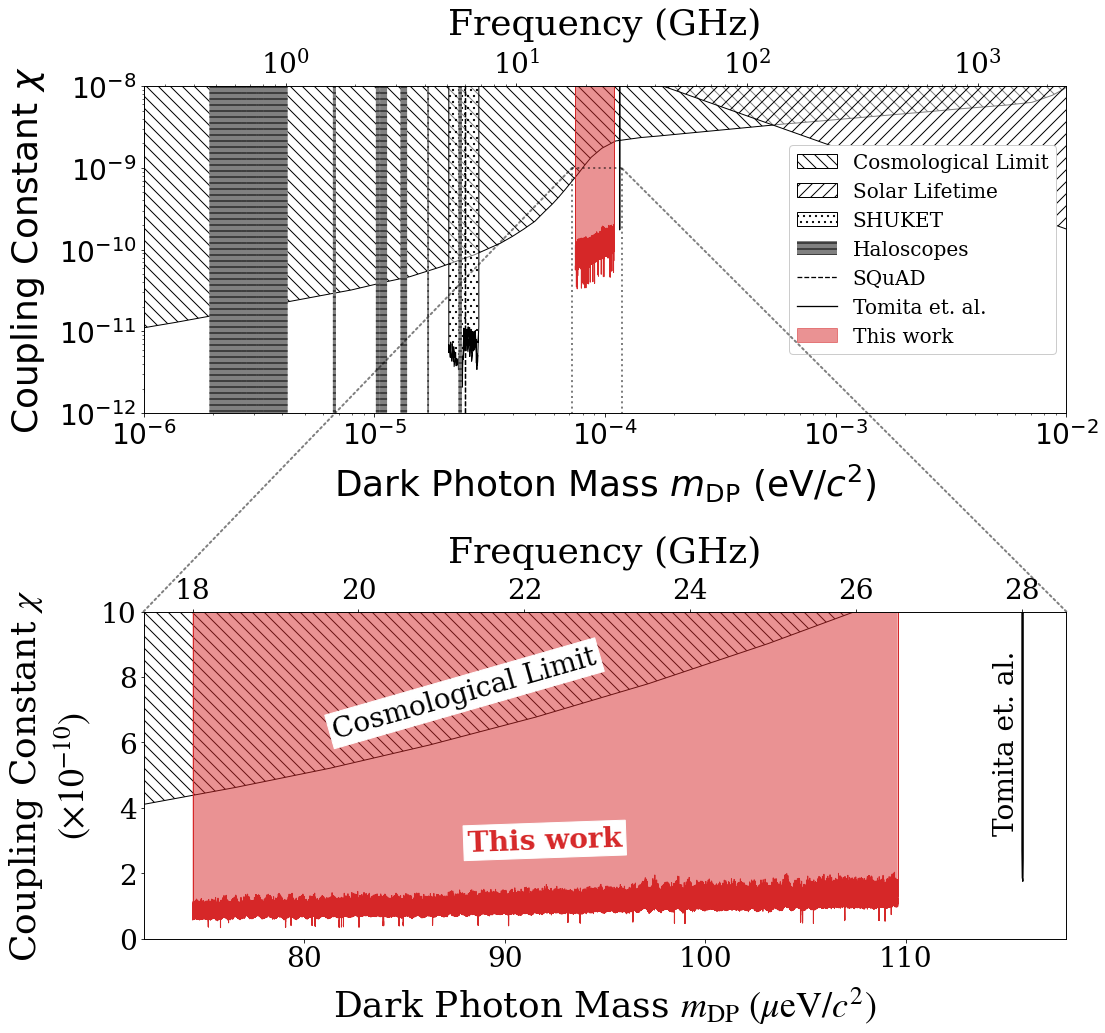

In [7]:
outdir = './plot/result_figure/'
axiondir = '/data/analysis/AxionLimits'

# Color Configuration for This (Black&White)
'''
this_fill_color='white'
this_alpha=0.5
this_lcolor='k'
this_hatch='....'
'''

# Color Configuration for This (Red)
this_fill_color='tab:red'
this_alpha=0.5
this_lcolor='tab:red'
this_hatch=''
this_lw=1

if not os.path.isdir(outdir): os.makedirs(outdir)

fig = plt.figure(figsize=(16, 15))
fig.tight_layout()
plt.rcParams["font.size"] = 28 # Nominal font size
fs = 36 # Label fontsize
#plt.suptitle("Constraints for Dark Photon Search")
plt.subplots_adjust()

# labels
label_CMB = 'Cosmological Limit'
label_Solar = 'Solar Lifetime'
label_SHUKET = 'SHUKET'
label_Halo = 'Haloscopes'
label_SQuAD = 'SQuAD'
label_Knirck = 'Knirck et. al.'
label_Tomita = 'Tomita et. al.'
label_This = 'This work'

## Upper Panel ###
# Create first axes, the top-left plot with green plot
sub1 = fig.add_subplot(2,1,1) # two rows, two columns, fist cell
xmin=1e-6
xmax=1e-2
ymin=1e-12
ymax=1e-8
alpha=0.5

# Cosmology (CMB)
Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/Cosmology_Arias', label=label_CMB,
      lw=1.0, lalpha=1.0, fillcolor='white', hatch='\\\\', ymax=ymax, alpha=alpha)

# Solar lifetime
StellarBounds(sub1, text_on=False, inputdir=axiondir,
    hatches=['//'], fillcolors=['white'], labels=[label_Solar]*3, lalpha=1.0, lw=1.0, alpha=alpha);

# Knirck
#Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/Tokyo-Knirck', label=label_knirck,
#      lw=1.0, lalpha=1.0, fillcolor='k', hatch='', alpha=alpha)

# SHUKET
Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/SHUKET', label=label_SHUKET,
      lw=1.0, lalpha=1.0, lc='k', fillcolor='white', hatch='..', alpha=alpha)

# Haloscopes
Haloscopes(sub1,fs=17,projection=True,text_on=False, inputdir='/data/analysis/AxionLimits',
    hatches=['--'], fillcolors=['gray'], labels=[label_Halo], lalpha=0.0, lw=0.0, alpha=1.0)

# SQuAD
Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/SQuAD', label=label_SQuAD,
      lw=1.3, lalpha=1.0, lc='k', ls='--', fillcolor=None, hatch=None, alpha=1.0)

# Tomita
Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/Tokyo-Tomita', label=label_Tomita,
      lw=1.3, lalpha=1.0, lc='k', ls='-', fillcolor=None, hatch=None, alpha=1.0)

# This
This(sub1, fillcolor=this_fill_color, alpha=this_alpha, hatch=this_hatch, lcolor=this_lcolor, label=label_This, 
     fs=fs, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, lw=this_lw)

sub1.legend(loc="center right", fontsize=20).get_frame().set_alpha(1)

## Lower Panel  (Zoom) ###
# Create second axes, the top-left plot with orange plot
sub2 = fig.add_subplot(2,1,2) # two rows, two columns, second cell
xmin = 72
xmax = 118
ymin = 0
ymax = 10
xscale = 1e+6 # eV --> ueV
yscale = 1e+10

# Cosmology (CMB)
#Limit(sub2, inputpath=f'{axiondir}/limit_data/DarkPhoton/Cosmology_Arias', label=label_CMB,
Limit(sub2, inputpath=f'{axiondir}/limit_data/DarkPhoton/DM_combined', label=label_CMB,
      lw=1.0, lalpha=1.0, fillcolor='white', hatch='\\\\', alpha=alpha,
      xscale=xscale, yscale=yscale, ymax=ymax)

# Tomita
Limit(sub2, inputpath=f'{axiondir}/limit_data/DarkPhoton/Tokyo-Tomita', label=label_Tomita,
     lw=1.3, lalpha=1.0, lc='k', ls='-', fillcolor='k', hatch=None, alpha=1.0,
     xscale=xscale, yscale=yscale, ymax=ymax)

# This
ThisZoom(sub2, fillcolor=this_fill_color, alpha=this_alpha, lcolor=this_lcolor, hatch=this_hatch, xscale=xscale, label=label_This,
     fs=fs, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, lw=this_lw)

#  Text
sub2.text( 88, 7.5, label_CMB, rotation=16, ha='center', va='center', color='k', weight='normal', backgroundcolor='white')
sub2.text(115, 6, label_Tomita, rotation=90, ha='center', va='center', color='k', weight='normal')
sub2.text( 92, 3., label_This, rotation=2 , ha='center', va='center', color=this_lcolor, weight='bold', backgroundcolor='white')

fig.subplots_adjust(hspace=0.4, left=0.2, bottom=0.15)

## Lines between upper and lower panels ##
line_w = 2.0
line_s = ':'
line_a = 0.5
con1 = patches.ConnectionPatch(xyA=(xmin, ymax), coordsA=sub2.transData, 
                       xyB=(xmin/xscale, ymax/yscale), coordsB=sub1.transData, color='black', linestyle = line_s, linewidth=line_w, alpha=line_a)
fig.add_artist(con1)
con2 = patches.ConnectionPatch(xyA=(xmax, ymax), coordsA=sub2.transData, 
                       xyB=(xmax/xscale, ymax/yscale), coordsB=sub1.transData, color='black', linestyle = line_s, linewidth=line_w, alpha=line_a)
fig.add_artist(con2)
# square in upper panel
sub1.hlines(ymax/yscale, xmin/xscale, xmax/xscale, color='k', linestyle=line_s, lw=line_w, alpha=line_a)
sub1.vlines(xmin/xscale, ymin/yscale, ymax/yscale, color='k', linestyle=line_s, lw=line_w, alpha=line_a)
sub1.vlines(xmax/xscale, ymin/yscale, ymax/yscale, color='k', linestyle=line_s, lw=line_w, alpha=line_a)
fig.tight_layout()

In [ ]:
fill_color_str = this_fill_color if ':' not in this_fill_color else this_fill_color.split(':')[1]
fig.savefig(f"{outdir}/limit_zoom_{fill_color_str}{outsuffix}.png")

## Plot limit without zoom

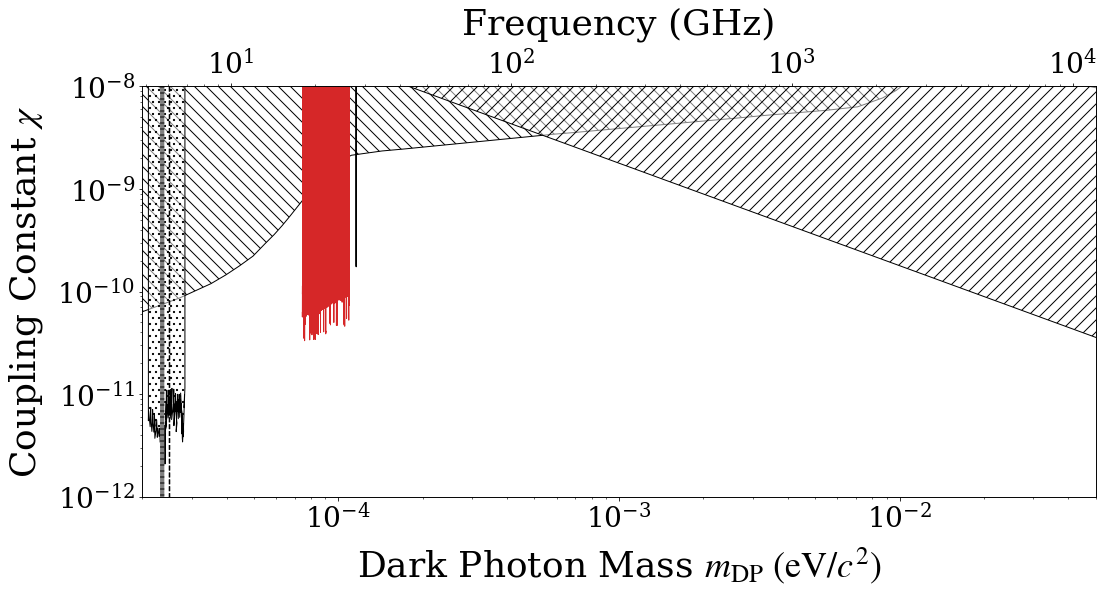

In [32]:
outdir = './plot/result_figure/'
axiondir = '/data/analysis/AxionLimits'

# Color Configuration for This (Black&White)
'''
this_fill_color='white'
this_alpha=0.5
this_lcolor='k'
this_hatch='....'
'''

# Color Configuration for This (Red)
this_fill_color='tab:red'
this_alpha=1.0
this_lcolor='tab:red'
this_hatch=''
this_lw=1

if not os.path.isdir(outdir): os.makedirs(outdir)

fig = plt.figure(figsize=(16, 15))
fig.tight_layout()
plt.rcParams["font.size"] = 28 # Nominal font size
fs = 36 # Label fontsize
#plt.suptitle("Constraints for Dark Photon Search")
plt.subplots_adjust()

# labels
label_CMB = 'Cosmological Limit'
label_Solar = 'Solar Lifetime'
label_SHUKET = 'SHUKET'
label_Halo = 'Haloscopes'
label_SQuAD = 'SQuAD'
label_Knirck = 'Knirck et. al.'
label_Tomita = 'Tomita et. al.'
label_This = 'This work'

## Upper Panel ###
# Create first axes, the top-left plot with green plot
sub1 = fig.add_subplot(2,1,1) # two rows, two columns, fist cell
xmin=2e-5
xmax=5e-2
ymin=1e-12
ymax=1e-8
alpha=0.5

# Cosmology (CMB)
Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/Cosmology_Arias', label=label_CMB,
      lw=1.0, lalpha=1.0, fillcolor='white', hatch='\\\\', ymax=ymax, alpha=alpha)

# Solar lifetime
StellarBounds(sub1, text_on=False, inputdir=axiondir,
    hatches=['//'], fillcolors=['white'], labels=[label_Solar]*3, lalpha=1.0, lw=1.0, alpha=alpha);

# Knirck
#Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/Tokyo-Knirck', label=label_knirck,
#      lw=1.0, lalpha=1.0, fillcolor='k', hatch='', alpha=alpha)

# SHUKET
Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/SHUKET', label=label_SHUKET,
      lw=1.0, lalpha=1.0, lc='k', fillcolor='white', hatch='..', alpha=alpha)

# Haloscopes
Haloscopes(sub1,fs=17,projection=True,text_on=False, inputdir='/data/analysis/AxionLimits',
    hatches=['--'], fillcolors=['gray'], labels=[label_Halo], lalpha=0.0, lw=0.0, alpha=1.0)

# SQuAD
Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/SQuAD', label=label_SQuAD,
      lw=1.3, lalpha=1.0, lc='k', ls='--', fillcolor=None, hatch=None, alpha=1.0)

# Tomita
Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/Tokyo-Tomita', label=label_Tomita,
      lw=1.3, lalpha=1.0, lc='k', ls='-', fillcolor=None, hatch=None, alpha=1.0)

# This
This(sub1, fillcolor=this_fill_color, alpha=this_alpha, hatch=this_hatch, lcolor=this_lcolor, label=label_This, 
     fs=fs, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, lw=this_lw)

#sub1.legend(loc="center right", fontsize=20).get_frame().set_alpha(1)

fig.tight_layout()

In [33]:
fill_color_str = this_fill_color if ':' not in this_fill_color else this_fill_color.split(':')[1]
fig.savefig(f"{outdir}/limit_zoom_nozoom_{fill_color_str}{outsuffix}.png")

## Check limit data

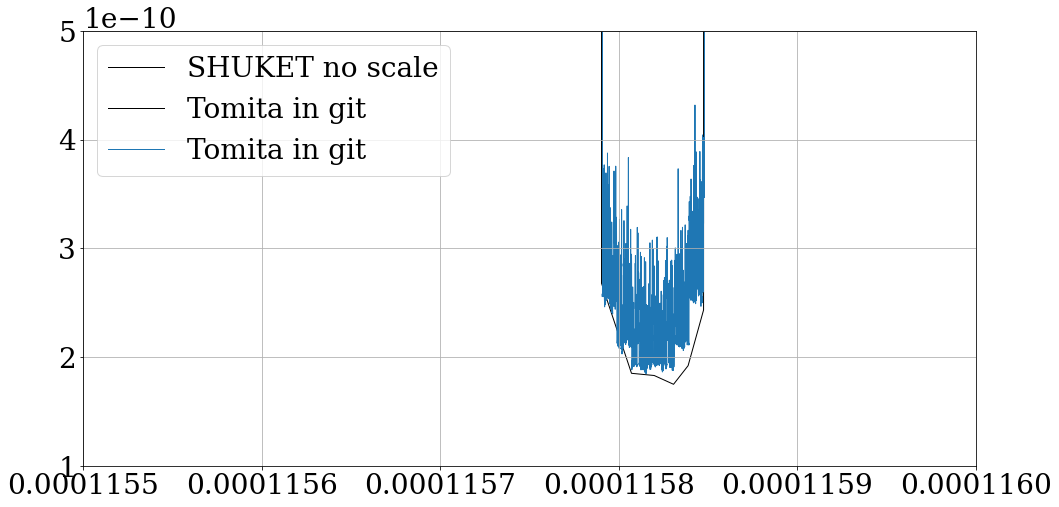

In [50]:
axiondir = '/data/analysis/AxionLimits'
oguridir = '/data/analysis/adachi/dosue-analysis/Limit/limit_data'

fig = plt.figure(figsize=(16, 8))
fig.tight_layout()
plt.rcParams["font.size"] = 28 # Nominal font size
fs = 36 # Label fontsize
#plt.suptitle("Constraints for Dark Photon Search")
plt.subplots_adjust()
ax = fig.add_subplot(1,1,1) # two rows, two columns, fist cell
xmin=2e-5
xmax=5e-2
ymin=1e-12
ymax=1e-8

# Cosmology (CMB)
#Limit(ax, inputpath=f'{axiondir}/limit_data/DarkPhoton/Cosmology_Arias', label=label_CMB,
#      lw=1.0, lalpha=1.0, fillcolor='white', hatch='\\\\', ymax=ymax, alpha=alpha)

# Solar lifetime
#StellarBounds(ax, text_on=False, inputdir=axiondir,
#    hatches=['//'], fillcolors=['white'], labels=[label_Solar]*3, lalpha=1.0, lw=1.0, alpha=alpha);

# Knirck
#Limit(ax, inputpath=f'{axiondir}/limit_data/DarkPhoton/Tokyo-Knirck', label=label_knirck,
#      lw=1.0, lalpha=1.0, fillcolor='k', hatch='', alpha=alpha)

# SHUKET
Limit(ax, inputpath=f'{axiondir}/limit_data/DarkPhoton/SHUKET', label='SHUKET no scale', lw=1.0, lc='k', fillcolor=None)

# Tomita in git
Limit(ax, inputpath=f'{axiondir}/limit_data/DarkPhoton/Tokyo-Tomita', label='Tomita in git', lw=1.0, lc='k', fillcolor=None)

# Tomita by Oguri
Limit(ax, inputpath=f'{oguridir}/result_raw', label='Tomita in git', lw=1.0, lc='tab:blue', fillcolor=None, xscale=1e-6)


#ax.set_ylim(1e-12,5e-10)
#ax.set_xlim(2e-5,2e-4)
ax.set_ylim(1e-10,5e-10)
ax.set_xlim(1.155e-4,1.16e-4)
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.grid()
ax.legend()

# Limit plot for slides

## Plot limit (color)

NameError: name 'Limit' is not defined

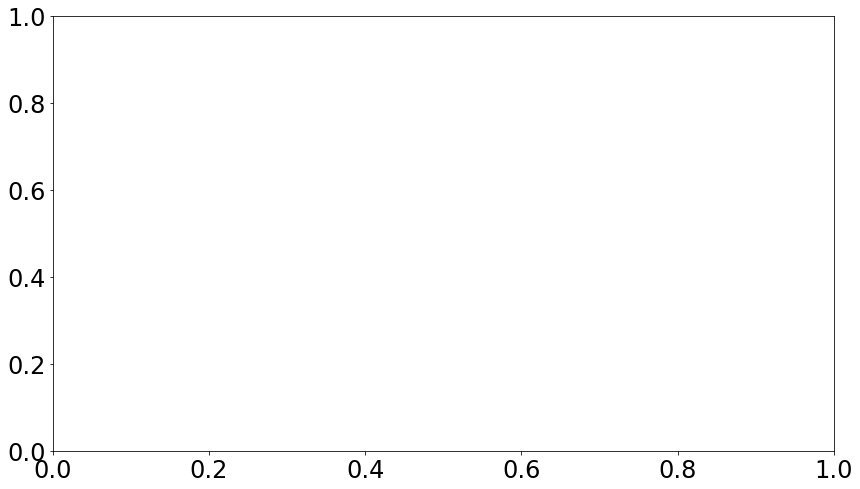

In [4]:
def plot_limit_color(
    showThis=True, showKumodes=True, showExperiments=True, 
    showSolarLifetime=True, showCMB=True
    ):
    outdir = './plot/result_figure/'
    axiondir = '/data/analysis/AxionLimits'


    # Color Configuration for This (Red)
    this_fill_color='tab:red'
    this_alpha=1.0
    this_lcolor='tab:red'
    this_hatch=''
    this_lw=1

    if not os.path.isdir(outdir): os.makedirs(outdir)

    fig = plt.figure(figsize=(14, 8))
    fig.tight_layout()
    plt.rcParams["font.size"] = 24 # Nominal font size
    fs = 30 # Label fontsize
    #plt.suptitle("Constraints for Dark Photon Search")
    plt.subplots_adjust()

    # labels
    label_CMB = 'Cosmological Limit'
    label_Solar = 'Solar Lifetime'
    label_SHUKET = 'SHUKET'
    label_Halo = 'Haloscopes'
    label_SQuAD = 'SQuAD'
    label_Knirck = 'Knirck et. al.'
    label_Tomita = 'Tomita et. al.'
    label_This = 'This work'

    ## Upper Panel ###
    # Create first axes, the top-left plot with green plot
    sub1 = fig.add_subplot(1,1,1) # two rows, two columns, fist cell
    xscale = 1e+6 # eV --> ueV
    xmin=1
    xmax=1e+5
    #ymin=1e-12
    ymin=3e-12
    ymax=1e-8
    alpha=0.4

    # Cosmology (CMB)
    if showCMB:
        Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/Cosmology_Arias', label=label_CMB, xscale=xscale,
                lw=0.0, lalpha=1.0, fillcolor='blue', hatch='', ymax=ymax, alpha=alpha)
        pass

    # Solar lifetime
    if showSolarLifetime:
        StellarBounds(sub1, text_on=False, inputdir=axiondir, xscale=xscale,
                hatches=[''], fillcolors=['red'], labels=[label_Solar]*3, lalpha=1.0, lw=0.0, alpha=alpha);
        pass

    if showExperiments:
        # Knirck
        #Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/Tokyo-Knirck', label=label_knirck, xscale=xscale,
        #      lw=1.0, lalpha=1.0, fillcolor='k', hatch='', alpha=alpha)
  
        # SHUKET
        Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/SHUKET', label=label_SHUKET, xscale=xscale,
              lw=0.0, lalpha=1.0, lc='k', fillcolor='black', hatch='', alpha=alpha)
  
        # Haloscopes
        Haloscopes(sub1,fs=17,projection=True,text_on=False, inputdir='/data/analysis/AxionLimits', xscale=xscale,
            hatches=[''], fillcolors=['green'], labels=[label_Halo], lalpha=0.0, lw=0.0, alpha=alpha)
  
        # SQuAD
        Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/SQuAD', label=label_SQuAD, xscale=xscale,
              lw=1.3, lalpha=1.0, lc='k', ls='--', fillcolor=None, hatch=None, alpha=alpha)
        pass

    if showKumodes:
        # Tomita
        Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/Tokyo-Tomita', label=label_Tomita, xscale=xscale,
              lw=1.3, lalpha=1.0, lc='k', ls='-', fillcolor=None, hatch=None, alpha=1.0)
        pass

    # This
    This(sub1, fillcolor=this_fill_color, alpha=this_alpha, hatch=this_hatch, lcolor=this_lcolor, label=label_This, xscale=xscale, 
         fs=fs, font='sans', mathfont='dejavusans', xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, lw=this_lw,
         xlabel=r"Dark Photon Mass $m_{\rm DP} ~(\mu{\rm eV}/c^2)$",
         doplot=showThis
        )

    #sub1.legend(loc="center right", fontsize=20).get_frame().set_alpha(1)

    plt.rcParams["mathtext.fontset"] = 'dejavusans'
    plt.rcParams["font.family"] = 'sans'
    fig.tight_layout()
    #plt.show()
    return fig
    ## Plot limit without this (color)
    
fig = plot_limit_color()    
fig.savefig(f"{outdir}/limit_for_slide_nozoom_{outsuffix}.png")

## Plot limit without this (color)

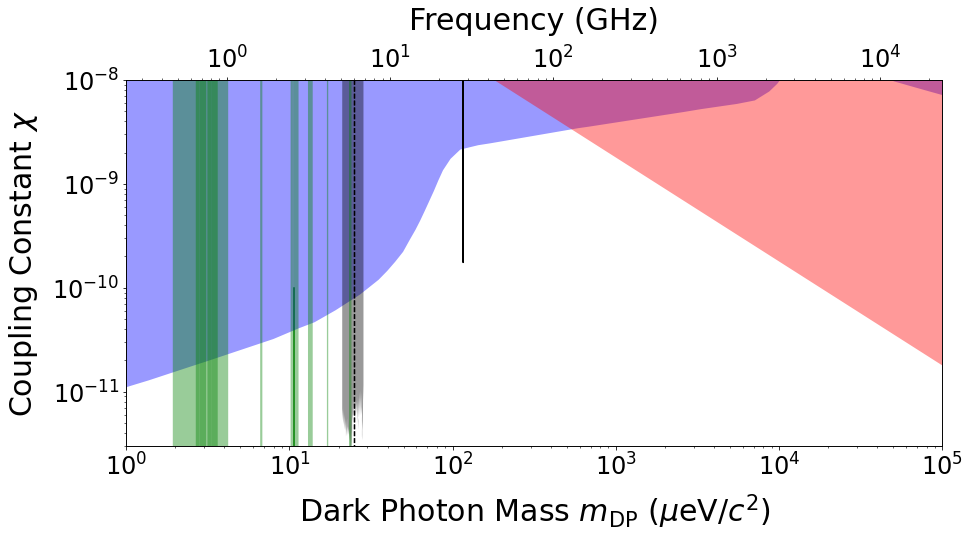

In [58]:
fig = plot_limit_color(showThis=False)
fig.savefig(f"{outdir}/limit_for_slide_nozoom_wtout_this_{outsuffix}.png")

## Plot limit without this & all experiments (color)

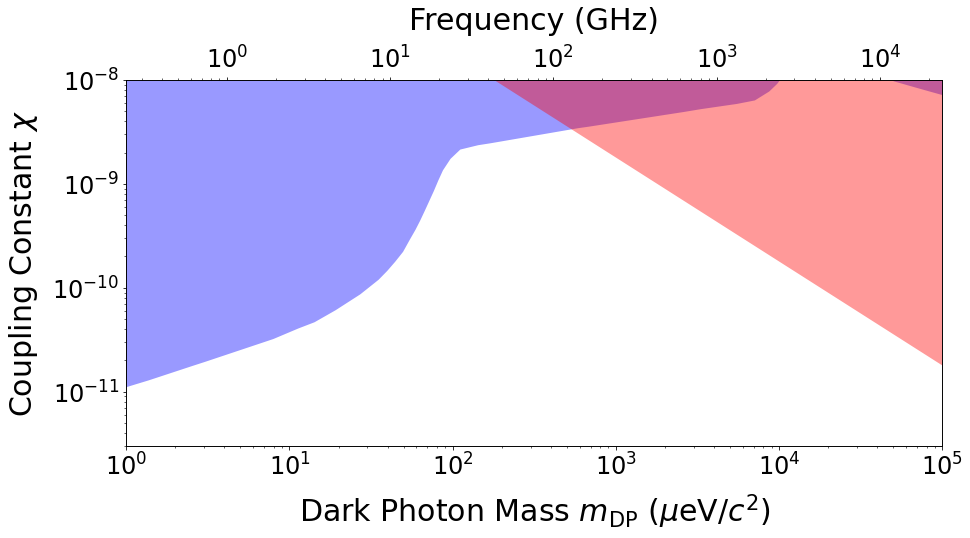

In [64]:
fig = plot_limit_color(showThis=False, showExperiments=False, showKumodes=False)
fig.savefig(f"{outdir}/limit_for_slide_nozoom_wtout_this-exp_{outsuffix}.png")

## Plot limit without this & all experiments & Solor lifetime (color)

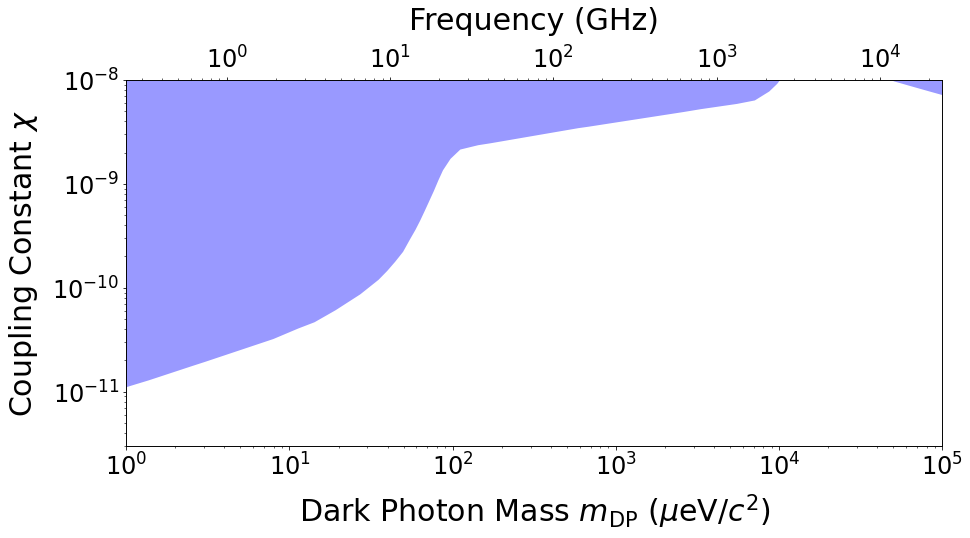

In [65]:
fig = plot_limit_color(showThis=False, showExperiments=False, showKumodes=False, showSolarLifetime=False)
fig.savefig(f"{outdir}/limit_for_slide_nozoom_wtout_this-exp-solar_{outsuffix}.png")

## Plot limit with DOSUE-Y expectation for KUMODES

In [92]:
# calculate expectation
k_B = 1.380649e-23  # boltzmann const. [J/K]
Trx = 100 # Trx # DSB Trx is < 100K  for Nagoya SIS mixer from ミリ波受信機ワークショップ
dnu = (200. * 1.e+9) * 1.e-6 # Peak width [Hz]
Tload = 300 * 2# Maximum Tload x 2 (due to DSB)
#Tload = 100 # Tload is supposed to be 100K.
#Tload = 20 # Tload is supposed to be 20K.
time = 60 # sec
Aeff = (0.71/2.)**2*np.pi * 0.5 # cm^2 # phi=0.71 cm (VDI conical horn)
#Aeff = (3./2.)**2*np.pi  * 0.5  # cm^2 # phi=3cm
Aeff_m = Aeff * 1.e-4 # m^2
rho_CDM = 0.3 # GeV/cm^2
alpha = np.sqrt(1./3.)

NEP = np.sqrt(2.*dnu) * k_B * (Trx + Tload) 
print(f'NEP = {NEP:e} [W/sqrt(Hz)]')

dP = NEP/np.sqrt(time)
chi = 4.5e-14 * np.sqrt( dP/1.e-23 *  1/Aeff_m * 0.3/rho_CDM ) * np.sqrt(2./3.) / alpha
print(f'dP = {dP:e} [W]')
print(f'chi = {chi:e}')

freq_min = 170. # GHz
freq_max = 260. # GHz
mass_min = freq_min/const # eV
mass_max = freq_max/const # eV
expect_mass = [mass_min, mass_max]
expect_y1 = [chi, chi]
expect_y2 = [1., 1.]

NEP = 6.112394e-18 [W/sqrt(Hz)]
dP = 7.891066e-19 [W]
chi = 4.017973e-09


In [93]:
# elapsed time
total_freq_span = (freq_max - freq_min) * 1e+9 # Hz
freq_span_per_measurement = 20.e+6 # 20MHz = DOSUE-K 2MHz * 10
n_measurement = total_freq_span / freq_span_per_measurement
total_time = n_measurement * time
print(f'Total time = {total_time} sec')
print(f'Total days = {total_time/24/3600} days')

Total time = 270000.0 sec
Total days = 3.125 days


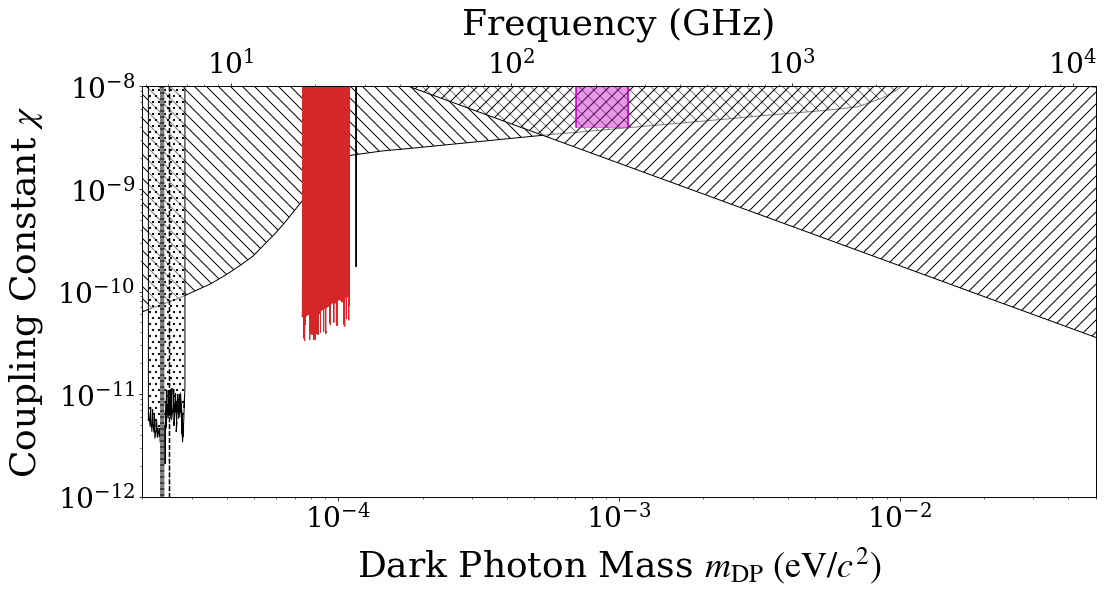

In [94]:
outdir = './plot/result_figure/'
axiondir = '/data/analysis/AxionLimits'

# Color Configuration for This (Black&White)
'''
this_fill_color='white'
this_alpha=0.5
this_lcolor='k'
this_hatch='....'
'''

# Color Configuration for This (Red)
this_fill_color='tab:red'
this_alpha=1.0
this_lcolor='tab:red'
this_hatch=''
this_lw=1

if not os.path.isdir(outdir): os.makedirs(outdir)

fig = plt.figure(figsize=(16, 15))
fig.tight_layout()
plt.rcParams["font.size"] = 28 # Nominal font size
fs = 36 # Label fontsize
#plt.suptitle("Constraints for Dark Photon Search")
plt.subplots_adjust()

# labels
label_CMB = 'Cosmological Limit'
label_Solar = 'Solar Lifetime'
label_SHUKET = 'SHUKET'
label_Halo = 'Haloscopes'
label_SQuAD = 'SQuAD'
label_Knirck = 'Knirck et. al.'
label_Tomita = 'Tomita et. al.'
label_This = 'This work'

## Upper Panel ###
# Create first axes, the top-left plot with green plot
sub1 = fig.add_subplot(2,1,1) # two rows, two columns, fist cell
xmin=2e-5
xmax=5e-2
ymin=1e-12
ymax=1e-8
alpha=0.5

# Cosmology (CMB)
Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/Cosmology_Arias', label=label_CMB,
      lw=1.0, lalpha=1.0, fillcolor='white', hatch='\\\\', ymax=ymax, alpha=alpha)

# Solar lifetime
StellarBounds(sub1, text_on=False, inputdir=axiondir,
    hatches=['//'], fillcolors=['white'], labels=[label_Solar]*3, lalpha=1.0, lw=1.0, alpha=alpha);

# Knirck
#Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/Tokyo-Knirck', label=label_knirck,
#      lw=1.0, lalpha=1.0, fillcolor='k', hatch='', alpha=alpha)

# SHUKET
Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/SHUKET', label=label_SHUKET,
      lw=1.0, lalpha=1.0, lc='k', fillcolor='white', hatch='..', alpha=alpha)

# Haloscopes
Haloscopes(sub1,fs=17,projection=True,text_on=False, inputdir='/data/analysis/AxionLimits',
    hatches=['--'], fillcolors=['gray'], labels=[label_Halo], lalpha=0.0, lw=0.0, alpha=1.0)

# SQuAD
Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/SQuAD', label=label_SQuAD,
      lw=1.3, lalpha=1.0, lc='k', ls='--', fillcolor=None, hatch=None, alpha=1.0)

# Tomita
Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/Tokyo-Tomita', label=label_Tomita,
      lw=1.3, lalpha=1.0, lc='k', ls='-', fillcolor=None, hatch=None, alpha=1.0)

# This
This(sub1, fillcolor=this_fill_color, alpha=this_alpha, hatch=this_hatch, lcolor=this_lcolor, label=label_This, 
     fs=fs, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, lw=this_lw)

# Expect
sub1.plot()
sub1.fill_between(expect_mass, expect_y1, expect_y2, color="m", alpha=0.4)
sub1.plot([expect_mass[0]]*2, [expect_y1[0],1.], color="m")
sub1.plot([expect_mass[1]]*2, [expect_y1[0],1.], color="m")

#sub1.legend(loc="center right", fontsize=20).get_frame().set_alpha(1)

fig.tight_layout()

## Plot limit with DOSUE-Y expectation for DOSUE-cryostat

In [11]:
# calculate expectation
k_B = 1.380649e-23  # boltzmann const. [J/K]
Trx = 70 # Trx # DSB Trx is < 100K  for Nagoya SIS mixer from ミリ波受信機ワークショップ
dnu = (200. * 1.e+9) * 1.e-6 # Peak width [Hz]
Tload = 100 # Maximum Tload x 2 (due to DSB)
#Tload = 100 # Tload is supposed to be 100K.
#Tload = 20 # Tload is supposed to be 20K.
time = 600 # sec
#Aeff = (21./2.)*np.pi/2 # cm^2 # phi=21cm
Aeff = (15./2.)*np.pi/2 # cm^2 # phi=15cm
Aeff_m = Aeff * 1.e-4 # m^2
rho_CDM = 0.3 # GeV/cm^2
alpha = np.sqrt(1./3.)

NEP = np.sqrt(2.*dnu) * k_B * (Trx + Tload) 
print(f'NEP = {NEP:e} [W/sqrt(Hz)]')

dP = NEP/np.sqrt(time)
chi = 4.5e-14 * np.sqrt( dP/1.e-23 *  1/Aeff_m * 0.3/rho_CDM ) * np.sqrt(2./3.) / alpha
print(f'dP = {dP:e} [W]')
print(f'chi = {chi:e}')

freq_min = 110. # GHz
#freq_min = 170. # GHz
freq_max = 260. # GHz
mass_min = freq_min/const # eV
mass_max = freq_max/const # eV
expect_mass = [mass_min, mass_max]
expect_y1 = [chi, chi]
expect_y2 = [1., 1.]

NEP = 1.484438e-18 [W/sqrt(Hz)]
dP = 6.060195e-20 [W]
chi = 1.443378e-10


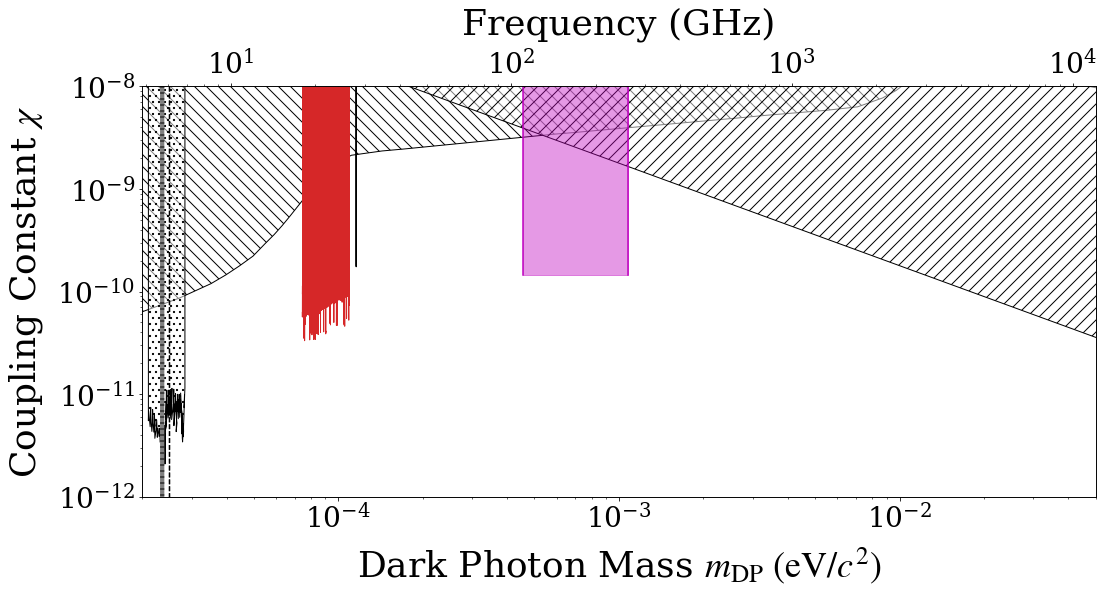

In [12]:
outdir = './plot/result_figure/'
axiondir = '/data/analysis/AxionLimits'

# Color Configuration for This (Black&White)
'''
this_fill_color='white'
this_alpha=0.5
this_lcolor='k'
this_hatch='....'
'''

# Color Configuration for This (Red)
this_fill_color='tab:red'
this_alpha=1.0
this_lcolor='tab:red'
this_hatch=''
this_lw=1

if not os.path.isdir(outdir): os.makedirs(outdir)

fig = plt.figure(figsize=(16, 15))
fig.tight_layout()
plt.rcParams["font.size"] = 28 # Nominal font size
fs = 36 # Label fontsize
#plt.suptitle("Constraints for Dark Photon Search")
plt.subplots_adjust()

# labels
label_CMB = 'Cosmological Limit'
label_Solar = 'Solar Lifetime'
label_SHUKET = 'SHUKET'
label_Halo = 'Haloscopes'
label_SQuAD = 'SQuAD'
label_Knirck = 'Knirck et. al.'
label_Tomita = 'Tomita et. al.'
label_This = 'This work'

## Upper Panel ###
# Create first axes, the top-left plot with green plot
sub1 = fig.add_subplot(2,1,1) # two rows, two columns, fist cell
xmin=2e-5
xmax=5e-2
ymin=1e-12
ymax=1e-8
alpha=0.5

# Cosmology (CMB)
Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/Cosmology_Arias', label=label_CMB,
      lw=1.0, lalpha=1.0, fillcolor='white', hatch='\\\\', ymax=ymax, alpha=alpha)

# Solar lifetime
StellarBounds(sub1, text_on=False, inputdir=axiondir,
    hatches=['//'], fillcolors=['white'], labels=[label_Solar]*3, lalpha=1.0, lw=1.0, alpha=alpha);

# Knirck
#Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/Tokyo-Knirck', label=label_knirck,
#      lw=1.0, lalpha=1.0, fillcolor='k', hatch='', alpha=alpha)

# SHUKET
Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/SHUKET', label=label_SHUKET,
      lw=1.0, lalpha=1.0, lc='k', fillcolor='white', hatch='..', alpha=alpha)

# Haloscopes
Haloscopes(sub1,fs=17,projection=True,text_on=False, inputdir='/data/analysis/AxionLimits',
    hatches=['--'], fillcolors=['gray'], labels=[label_Halo], lalpha=0.0, lw=0.0, alpha=1.0)

# SQuAD
Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/SQuAD', label=label_SQuAD,
      lw=1.3, lalpha=1.0, lc='k', ls='--', fillcolor=None, hatch=None, alpha=1.0)

# Tomita
Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/Tokyo-Tomita', label=label_Tomita,
      lw=1.3, lalpha=1.0, lc='k', ls='-', fillcolor=None, hatch=None, alpha=1.0)

# This
This(sub1, fillcolor=this_fill_color, alpha=this_alpha, hatch=this_hatch, lcolor=this_lcolor, label=label_This, 
     fs=fs, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, lw=this_lw)

# Expect
sub1.plot()
sub1.fill_between(expect_mass, expect_y1, expect_y2, color="m", alpha=0.4)
sub1.plot([expect_mass[0]]*2, [expect_y1[0],1.], color="m")
sub1.plot([expect_mass[1]]*2, [expect_y1[0],1.], color="m")

#sub1.legend(loc="center right", fontsize=20).get_frame().set_alpha(1)

fig.tight_layout()

## Color limit for DOSUE-Q (Sumida)

In [24]:
# calculate expectation
k_B = 1.380649e-23  # boltzmann const. [J/K]
Trx = 12 # Trx # LNA 8K @ 33 GHz - 14 @ 50 GHz
dnu = (40. * 1.e+9) * 1.e-6 # Peak width [Hz]
Tload = 70 # 外からの熱放射
time = 600 # sec
Aeff = 4.318*4.318 * 0.5 # cm^2 piraimdal, factor 1/2 (uncertainty)
Aeff_m = Aeff * 1.e-4 # m^2
rho_CDM = 0.3 # GeV/cm^2
alpha = np.sqrt(1./3.)

NEP = np.sqrt(2.*dnu) * k_B * (Trx + Tload) 
print(f'NEP = {NEP:e} [W/sqrt(Hz)]')

dP = NEP/np.sqrt(time)
chi = 4.5e-14 * np.sqrt( dP/1.e-23 *  1/Aeff_m * 0.3/rho_CDM ) * np.sqrt(2./3.) / alpha
print(f'dP = {dP:e} [W]')
print(f'chi = {chi:e}')

freq_min = 33. # GHz
freq_max = 50. # GHz
mass_min = freq_min/const * 1.e+6 # ueV
mass_max = freq_max/const * 1.e+6 # ueV
expect_mass = [mass_min, mass_max]
expect_y1 = [chi, chi]
expect_y2 = [1., 1.]

NEP = 3.202153e-19 [W/sqrt(Hz)]
dP = 1.307274e-20 [W]
chi = 7.536039e-11


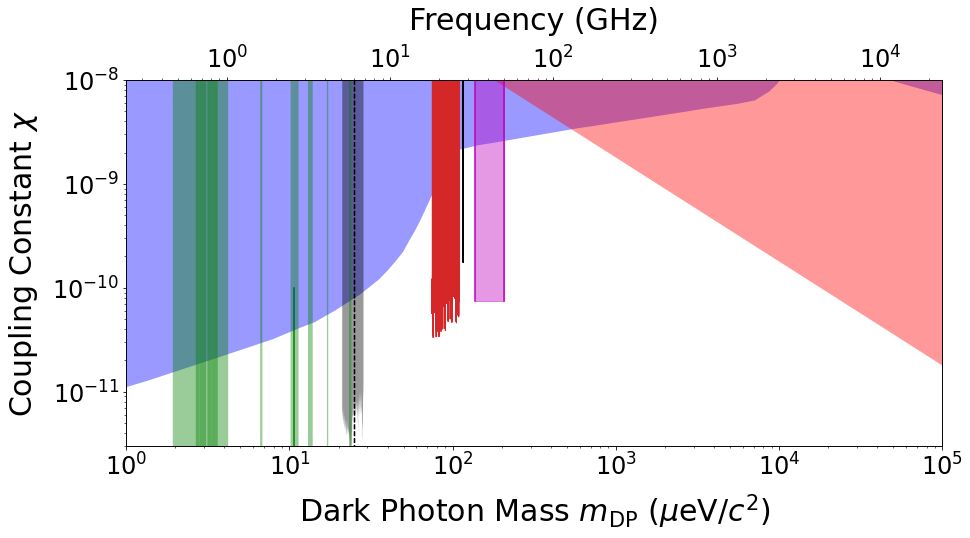

In [25]:
def plot_limit_color(
    showThis=True, showKumodes=True, showExperiments=True, 
    showSolarLifetime=True, showCMB=True
    ):
    outdir = './plot/result_figure/'
    axiondir = '/data/analysis/AxionLimits'


    # Color Configuration for This (Red)
    this_fill_color='tab:red'
    this_alpha=1.0
    this_lcolor='tab:red'
    this_hatch=''
    this_lw=1

    if not os.path.isdir(outdir): os.makedirs(outdir)

    fig = plt.figure(figsize=(14, 8))
    fig.tight_layout()
    plt.rcParams["font.size"] = 24 # Nominal font size
    fs = 30 # Label fontsize
    #plt.suptitle("Constraints for Dark Photon Search")
    plt.subplots_adjust()

    # labels
    label_CMB = 'Cosmological Limit'
    label_Solar = 'Solar Lifetime'
    label_SHUKET = 'SHUKET'
    label_Halo = 'Haloscopes'
    label_SQuAD = 'SQuAD'
    label_Knirck = 'Knirck et. al.'
    label_Tomita = 'Tomita et. al.'
    label_This = 'This work'

    ## Upper Panel ###
    # Create first axes, the top-left plot with green plot
    sub1 = fig.add_subplot(1,1,1) # two rows, two columns, fist cell
    xscale = 1e+6 # eV --> ueV
    xmin=1
    xmax=1e+5
    #ymin=1e-12
    ymin=3e-12
    ymax=1e-8
    alpha=0.4

    # Cosmology (CMB)
    if showCMB:
        Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/Cosmology_Arias', label=label_CMB, xscale=xscale,
                lw=0.0, lalpha=1.0, fillcolor='blue', hatch='', ymax=ymax, alpha=alpha)
        pass

    # Solar lifetime
    if showSolarLifetime:
        StellarBounds(sub1, text_on=False, inputdir=axiondir, xscale=xscale,
                hatches=[''], fillcolors=['red'], labels=[label_Solar]*3, lalpha=1.0, lw=0.0, alpha=alpha);
        pass

    if showExperiments:
        # Knirck
        #Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/Tokyo-Knirck', label=label_knirck, xscale=xscale,
        #      lw=1.0, lalpha=1.0, fillcolor='k', hatch='', alpha=alpha)
  
        # SHUKET
        Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/SHUKET', label=label_SHUKET, xscale=xscale,
              lw=0.0, lalpha=1.0, lc='k', fillcolor='black', hatch='', alpha=alpha)
  
        # Haloscopes
        Haloscopes(sub1,fs=17,projection=True,text_on=False, inputdir='/data/analysis/AxionLimits', xscale=xscale,
            hatches=[''], fillcolors=['green'], labels=[label_Halo], lalpha=0.0, lw=0.0, alpha=alpha)
  
        # SQuAD
        Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/SQuAD', label=label_SQuAD, xscale=xscale,
              lw=1.3, lalpha=1.0, lc='k', ls='--', fillcolor=None, hatch=None, alpha=alpha)
        pass

    if showKumodes:
        # Tomita
        Limit(sub1, inputpath=f'{axiondir}/limit_data/DarkPhoton/Tokyo-Tomita', label=label_Tomita, xscale=xscale,
              lw=1.3, lalpha=1.0, lc='k', ls='-', fillcolor=None, hatch=None, alpha=1.0)
        pass

    # This
    This(sub1, fillcolor=this_fill_color, alpha=this_alpha, hatch=this_hatch, lcolor=this_lcolor, label=label_This, xscale=xscale, 
         fs=fs, font='sans', mathfont='dejavusans', xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, lw=this_lw,
         xlabel=r"Dark Photon Mass $m_{\rm DP} ~(\mu{\rm eV}/c^2)$",
         doplot=showThis
        )
    sub1.plot()
    sub1.fill_between(expect_mass, expect_y1, expect_y2, color="m", alpha=0.4)
    sub1.plot([expect_mass[0]]*2, [expect_y1[0],1.], color="m")
    sub1.plot([expect_mass[1]]*2, [expect_y1[0],1.], color="m")
    #sub1.legend(loc="center right", fontsize=20).get_frame().set_alpha(1)

    plt.rcParams["mathtext.fontset"] = 'dejavusans'
    plt.rcParams["font.family"] = 'sans'
    fig.tight_layout()
    #plt.show()
    return fig
    ## Plot limit without this (color)
    
fig = plot_limit_color()    


fig.savefig(f"{outdir}/limit_for_DOSUE-Q_sumida_{outsuffix}.png")